In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
#nRowsRead = 1000 # specify 'None' if want to read whole file
# multipleChoice.csv has 23859 rows in reality, but we are only loading/previewing the first 1000 rows
# df1 = pd.read_csv('E:/Kaggle/Survey/multipleChoiceResponses.csv', delimiter=',', nrows = nRowsRead)
df1 = pd.read_csv('E:/Kaggle/Survey/multipleChoiceResponses.csv')
df1.dataframeName = 'multipleChoice.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 23860 rows and 395 columns


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.shape

(23860, 395)

In [4]:
df1 = df1[df1['Q1'] !='What is your gender? - Selected Choice']

In [5]:
df1.shape

(23859, 395)

In [18]:
#### all_features = all_features.drop('Ticket', axis=1)
df1 = df1.drop(['Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q12_Part_1_TEXT', 'Q12_Part_2_TEXT', 'Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT','Q12_OTHER_TEXT'],axis=1)

In [19]:
df1.shape

(23859, 385)

In [20]:
df1=df1.drop(['Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q15_OTHER_TEXT','Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT'],axis=1)

In [21]:
df1=df1.drop(['Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT','Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT'],axis=1)

In [22]:
df1=df1.drop(['Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT','Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT'],axis=1)

In [23]:
df1=df1.drop(['Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT','Q38_OTHER_TEXT', 'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT'],axis=1)

In [24]:
df1=df1.drop('Q50_OTHER_TEXT', axis=1)

In [25]:
df1.shape

(23859, 360)

# Data Cleaning Starts

#### There are 959 records which are having blank data from Q6 onwords so we have removed those record from analysis 

In [6]:
len(df1[df1['Q6'].isnull()])

959

In [7]:
# df = df[pd.notnull(df['Gender'])]
df1 = df1[pd.notnull(df1['Q6'])]

In [8]:
df1.shape

(22900, 395)

#### Clean Q7

#### The title is " In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice"
#### It will be blank if the person is either (Student, not Employed) 
#### But there are cases where respondand has answer current role in Q6 and not answer in Q7
#### Again These people are not filled any other information from Q7
#### So we will delete these records as well.

In [9]:
len(df1[df1['Q7'].isnull()] )

1215

In [10]:
len(df1.loc[(df1['Q7'].isnull() & df1['Q6'].isin(['Student', 'Not employed']))])

923

In [11]:
len(df1.loc[(df1['Q7'].isnull() & ~df1['Q6'].isin(['Student', 'Not employed']))])

292

In [12]:
df1.drop(df1.loc[(df1['Q7'].isnull() & ~df1['Q6'].isin(['Student', 'Not employed']))].index, inplace=True)

In [13]:
df1.shape

(22608, 395)

In [14]:
# df1.to_csv('E:/Kaggle/Survey/Clean1.csv') # if path is not given then it will save in C:\Users\Admin

#### Clean Q8

In [21]:
def missing(data):
    total=data['Q8'].isnull().sum(), data['Q9'].isnull().sum(),data['Q10'].isnull().sum()
    miss_dic = ({'MQ8':total[0],'MQ9':total[1],'MQ10':total[2]})
    return miss_dic

In [22]:
missing(df1)

{'MQ8': 1507, 'MQ9': 2423, 'MQ10': 1939}

In [23]:
df1['Q8'] = df1['Q8'].fillna('Blank')

In [24]:
total = df1['Q8'].isnull().sum(), df1['Q9'].isnull().sum(),df1['Q10'].isnull().sum()
print(total)

(0, 2423, 1939)


In [25]:
pd.crosstab(df1['Q6'],df1['Q8'], margins=True) # Display Total

Q8,0-1,1-2,10-15,15-20,2-3,20-25,25-30,3-4,30 +,4-5,5-10,Blank,All
Q6,,,,,,,,,,,,,
Business Analyst,198,122,47,22,95,10,7,63,4,50,127,13,758
Chief Officer,42,37,48,26,34,25,16,21,9,29,66,1,354
Consultant,105,109,78,66,80,33,21,63,28,56,125,6,770
DBA/Database Engineer,15,17,20,9,14,7,2,11,1,7,40,2,145
Data Analyst,634,362,72,29,277,17,7,141,7,119,184,25,1874
Data Engineer,177,153,47,18,110,12,1,63,2,46,89,3,721
Data Journalist,3,5,3,2,2,0,1,0,0,2,1,0,19
Data Scientist,1293,949,131,58,584,33,14,324,16,277,351,36,4066
Developer Advocate,21,12,10,9,13,1,2,11,0,11,24,0,114


In [26]:
df1['Q9'].value_counts()

I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                                                      457
200-250,000                       

#### Now in Q8 there are many null (Which we replaced with Blank) even if respondants mention their role in Q6 
#### So we replace all it with '00-01' Except for 'Not employed'

In [27]:
df1['Q9'].replace('I do not wish to disclose my approximate yearly compensation', 0, inplace=True)

In [28]:
df1['Q9'].fillna(0,inplace=True)

In [29]:
missing(df1)

{'MQ8': 0, 'MQ9': 0, 'MQ10': 1939}

In [30]:
df1['Q9'].value_counts()

0              7179
0-10,000       4398
10-20,000      1937
20-30,000      1395
30-40,000      1119
40-50,000       965
50-60,000       919
100-125,000     843
60-70,000       729
70-80,000       677
90-100,000      566
125-150,000     533
80-90,000       506
150-200,000     457
200-250,000     172
250-300,000      75
500,000+         63
300-400,000      52
400-500,000      23
Name: Q9, dtype: int64

In [31]:
df1['Q9_Mean'] = df1['Q9']

In [32]:
df1['Q9_Mean'].replace('0-10,000',5000,inplace=True)
df1['Q9_Mean'].replace('10-20,000',15000,inplace=True)
df1['Q9_Mean'].replace('20-30,000',25000,inplace=True)
df1['Q9_Mean'].replace('30-40,000',35000,inplace=True)
df1['Q9_Mean'].replace('40-50,000',45000,inplace=True)
df1['Q9_Mean'].replace('50-60,000',55000,inplace=True)
df1['Q9_Mean'].replace('60-70,000',65000,inplace=True)
df1['Q9_Mean'].replace('70-80,000',75000,inplace=True)
df1['Q9_Mean'].replace('80-90,000',85000,inplace=True)
df1['Q9_Mean'].replace('90-100,000',95000,inplace=True)
df1['Q9_Mean'].replace('100-125,000',112500,inplace=True)
df1['Q9_Mean'].replace('125-150,000',137500,inplace=True)
df1['Q9_Mean'].replace('150-200,000',175000,inplace=True)
df1['Q9_Mean'].replace('200-250,000',225000,inplace=True)
df1['Q9_Mean'].replace('250-300,000',275000,inplace=True)
df1['Q9_Mean'].replace('300-400,000',350000,inplace=True)
df1['Q9_Mean'].replace('400-500,000',450000,inplace=True)
df1['Q9_Mean'].replace('500,000+',550000,inplace=True)

In [33]:
df1['Q9_Mean'].value_counts()

0         7179
5000      4398
15000     1937
25000     1395
35000     1119
45000      965
55000      919
112500     843
65000      729
75000      677
95000      566
137500     533
85000      506
175000     457
225000     172
275000      75
550000      63
350000      52
450000      23
Name: Q9_Mean, dtype: int64

#### Now we have to replace 'I do not wish to disclose my approximate yearly compensation' with proper value.

In [46]:
#zz=df1.groupby('Q6')

In [47]:
#df1.groupby(['Q6','Q8']).groups

In [45]:
#zz.get_group('Business Analyst')

####   what is the average income for people with Q6 == 'Business Analyst' and Q8 = '00-01' now this value we can use to replace blank in Q9_Mean.

In [34]:
df1.shape

(22608, 396)

In [35]:
pd.crosstab(df1['Q6'], df1['Q8'], margins=False,values=df1['Q9_Mean'] , 
                     dropna=True, aggfunc='mean').reset_index().fillna(0) 
#This is wronge because it gives mean considering null as 0 

Q8,Q6,0-1,1-2,10-15,15-20,2-3,20-25,25-30,3-4,30 +,4-5,5-10,Blank
0,Business Analyst,25479.797980,29487.704918,62978.723404,77613.636364,33394.736842,52500.000000,43928.571429,38650.793651,46250.000000,43950.000000,48169.291339,6153.846154
1,Chief Officer,62857.142857,51418.918919,93958.333333,127596.153846,69338.235294,64600.000000,182500.000000,84166.666667,265277.777778,87413.793103,110568.181818,0.000000
2,Consultant,40547.619048,37889.908257,65833.333333,73409.090909,50593.750000,86287.878788,72976.190476,57817.460317,72946.428571,39419.642857,52480.000000,18750.000000
3,DBA/Database Engineer,33666.666667,17352.941176,42000.000000,44722.222222,40357.142857,116428.571429,65000.000000,23636.363636,112500.000000,42500.000000,33312.500000,0.000000
4,Data Analyst,22590.694006,29910.220994,50937.500000,57931.034483,34702.166065,48235.294118,70000.000000,35212.765957,54642.857143,43949.579832,46182.065217,600.000000
5,Data Engineer,29237.288136,35147.058824,74202.127660,64027.777778,34704.545455,103125.000000,112500.000000,46825.396825,68750.000000,70217.391304,56741.573034,0.000000
6,Data Journalist,1666.666667,59000.000000,37500.000000,81250.000000,71250.000000,0.000000,0.000000,0.000000,0.000000,7500.000000,0.000000,0.000000
7,Data Scientist,36540.989946,47418.335090,90400.763359,93060.344828,54931.506849,76742.424242,106964.285714,62376.543210,106250.000000,73583.032491,75185.185185,694.444444
8,Developer Advocate,14523.809524,24375.000000,30500.000000,64444.444444,59230.769231,0.000000,56250.000000,33409.090909,0.000000,35227.272727,35520.833333,0.000000
9,Manager,70885.416667,76169.354839,73442.982456,88181.818182,72500.000000,98083.333333,88958.333333,69534.883721,52083.333333,59236.111111,65037.593985,0.000000


In [37]:
df1['Q9_Mean'].replace(0,np.nan,inplace=True)

In [38]:
pd.crosstab(df1['Q6'], df1['Q8'], margins=False,values=df1['Q9_Mean'] , 
                     dropna=True, aggfunc='mean').reset_index().dropna()

Q8,Q6,0-1,1-2,10-15,15-20,2-3,20-25,25-30,3-4,30 +,4-5,5-10,Blank
0,Business Analyst,38219.696970,36338.383838,68837.209302,94861.111111,44062.500000,75000.000000,76875.000000,45092.592593,61666.666667,51104.651163,55112.612613,20000.0
2,Consultant,50684.523810,45888.888889,87033.898305,115357.142857,66352.459016,123804.347826,117884.615385,70048.076923,107500.000000,53841.463415,74545.454545,112500.0
4,Data Analyst,31408.991228,39516.423358,58214.285714,80000.000000,41793.478261,63076.923077,70000.000000,46839.622642,76500.000000,51782.178218,57030.201342,5000.0
7,Data Scientist,48558.581706,56320.400501,111721.698113,128511.904762,66556.016598,115113.636364,166388.888889,71921.708185,121428.571429,84225.206612,94928.057554,25000.0
11,Other,43355.978261,37644.230769,73089.430894,82631.578947,52500.000000,116696.428571,119750.000000,52993.421053,196704.545455,53000.000000,56460.674157,5000.0
15,Research Scientist,46661.290323,41836.734694,61055.555556,58636.363636,48629.807692,92500.000000,82812.500000,50512.048193,147045.454545,58296.703297,54534.161491,35000.0
17,Software Engineer,30843.301435,30931.122449,78734.693878,91689.189189,37582.720588,109716.981132,112777.777778,40120.192308,165543.478261,47614.285714,57576.650943,5000.0
19,Student,9990.167158,12769.495413,9886.363636,7274.590164,13174.342105,30000.000000,35000.000000,13372.340426,371666.666667,15652.173913,18562.992126,7500.0


In [ ]:
g1=df1.groupby(['Q6','Q8'])
g2=g1['Q9_Mean'].transform('mean').dropna()

<BarContainer object of 22608 artists>

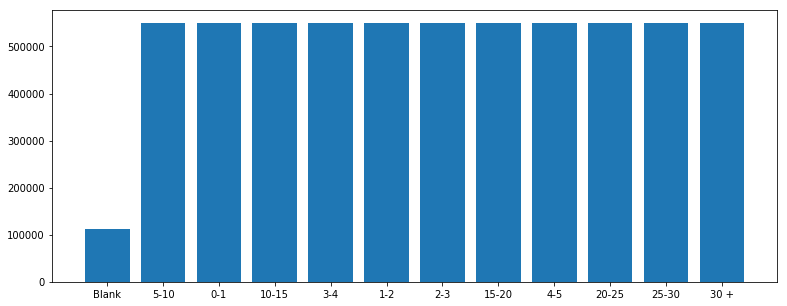

In [73]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 5
plt.bar(df1['Q8'],df1['Q9_Mean'])

In [59]:
#group_mean = bb1.groupby(['A1', 'A2'])['A3'].transform('mean')
group_mean = df1.groupby(['Q6', 'Q8'])['Q9_Mean'].transform('mean')

In [64]:
group_mean.head(10)

1     18750.000000
2     45475.113122
3     36540.989946
4         0.000000
5     22590.694006
6     36540.989946
7     55493.827160
8     32561.224490
9         0.000000
10    31609.848485
Name: Q9_Mean, dtype: float64

In [68]:
# [lambda x: x >= 500]
group_mean1 = df1.groupby(['Q6', 'Q8'])['Q9_Mean'].transform('mean')[lambda x: x > 0]

In [69]:
group_mean.head(10)

1     18750.000000
2     45475.113122
3     36540.989946
4         0.000000
5     22590.694006
6     36540.989946
7     55493.827160
8     32561.224490
9         0.000000
10    31609.848485
Name: Q9_Mean, dtype: float64

In [76]:
len(g1)

228

In [83]:
df1['Q9_Mean'].replace('',np.nan,inplace=True)

In [84]:
df1['Q9_Mean'].head(5)

1        NaN
2    15000.0
3     5000.0
4        NaN
5     5000.0
Name: Q9_Mean, dtype: float64

In [85]:
g1=df1.groupby(['Q6','Q8'])
g2=g1['Q9_Mean'].transform('mean').dropna()
g2

1        112500.000000
2         56460.674157
3         48558.581706
5         31408.991228
6         48558.581706
7         73089.430894
8         43355.978261
10        40120.192308
11        13372.340426
12        94928.057554
13         7500.000000
14        26709.401709
15        39516.423358
16        48558.581706
17        56320.400501
18        52500.000000
19        56460.674157
20        94928.057554
21       105600.000000
22         7500.000000
23        77228.260870
24        46661.290323
25        94928.057554
26        26709.401709
27        52500.000000
28        41793.478261
29        68837.209302
30        37582.720588
31         9990.167158
32        36338.383838
             ...      
23815     37582.720588
23816     30843.301435
23817     77228.260870
23821     48558.581706
23822     74545.454545
23823     30931.122449
23824     61055.555556
23826     52500.000000
23827     46661.290323
23828     43355.978261
23829     15652.173913
23830    123750.000000
23831     1

In [88]:
df1['Q9_Mean2'] = g2

In [89]:
df1.to_csv('E:/Kaggle/Survey/Clean02.csv')

In [86]:
df1.shape

(22608, 397)

In [87]:
df1['Q9_Mean'].isnull().sum()

7179

In [49]:
df1['Q9_Mean'].replace(np.nan,0,inplace=True)

In [40]:
g1=df1.groupby(['Q6','Q8'])
g2=g1['Q9_Mean'].transform('mean').dropna()
#df1['Q9_Mean'] = df1['Q9_Mean'].mask(g2['A4'] == 0, group_mean)

In [50]:
df1['Q9_Mean'] = df1['Q9_Mean'].mask(df1['Q9_Mean'] == 0 , g2)

In [51]:
df1['Q9_Mean01']=g2

In [53]:
df1.to_csv('E:/Kaggle/Survey/Clean03.csv')

In [41]:
g2

1        112500.000000
2         56460.674157
3         48558.581706
5         31408.991228
6         48558.581706
7         73089.430894
8         43355.978261
10        40120.192308
11        13372.340426
12        94928.057554
13         7500.000000
14        26709.401709
15        39516.423358
16        48558.581706
17        56320.400501
18        52500.000000
19        56460.674157
20        94928.057554
21       105600.000000
22         7500.000000
23        77228.260870
24        46661.290323
25        94928.057554
26        26709.401709
27        52500.000000
28        41793.478261
29        68837.209302
30        37582.720588
31         9990.167158
32        36338.383838
             ...      
23815     37582.720588
23816     30843.301435
23817     77228.260870
23821     48558.581706
23822     74545.454545
23823     30931.122449
23824     61055.555556
23826     52500.000000
23827     46661.290323
23828     43355.978261
23829     15652.173913
23830    123750.000000
23831     1

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 5



for i, v in enumerate(df11['Q9_Mean']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.bar(df1['x'],df1['val'])

# Q11, Q13, Q14, 15,16,17,18,19,21,22, 27, 

|Analyze and understand data to influence product or business decisions	                            | 9532|
|---------------------------------------------------------------------------------------------------|-----|
|Build and/or run a machine learning service that operationally improves my product or workflows	| 5481|


In [42]:
df1['Q11_Part_1'].value_counts()

Analyze and understand data to influence product or business decisions    9532
Name: Q11_Part_1, dtype: int64

In [43]:
df1['Q11_Part_2'].value_counts()

Build and/or run a machine learning service that operationally improves my product or workflows    5481
Name: Q11_Part_2, dtype: int64

In [54]:
filter_col = [col for col in df1 if col.startswith('Q11_Part')]
filter_col

['Q11_Part_1',
 'Q11_Part_2',
 'Q11_Part_3',
 'Q11_Part_4',
 'Q11_Part_5',
 'Q11_Part_6',
 'Q11_Part_7']

In [57]:
n=df1.shape[0]
n

22608

In [58]:
t11=df1[filter_col[0]].value_counts()
t12=df1[filter_col[1]].value_counts()
t13=df1[filter_col[2]].value_counts()
t14=df1[filter_col[3]].value_counts()
t15=df1[filter_col[4]].value_counts()
t16=df1[filter_col[5]].value_counts()
t17=df1[filter_col[6]].value_counts()

d1={'Des': [t11,t12,t13,t14,t15,t16,t17],'Fre' :[t11[0],t12[0],t13[0],t14[0],t15[0],t16[0],t17[0]]}

f2=pd.DataFrame(d1)

f2['Per'] = (f2.Fre * 100)/n

f2

,Des,Fre,Per
0,Analyze and understand data to influence produ...,9532,42.162067
1,Build and/or run a machine learning service th...,5481,24.243631
2,Build and/or run the data infrastructure that ...,5233,23.146674
3,Build prototypes to explore applying machine l...,7233,31.993100
4,Do research that advances the state of the art...,4934,21.824133
5,None of these activities are an important part...,3471,15.352972
6,"Other 1192 Name: Q11_Part_7, dtype: int64",1192,5.272470


In [61]:
f2['Des']

0    Analyze and understand data to influence produ...
1    Build and/or run a machine learning service th...
2    Build and/or run the data infrastructure that ...
3    Build prototypes to explore applying machine l...
4    Do research that advances the state of the art...
5    None of these activities are an important part...
6         Other    1192
Name: Q11_Part_7, dtype: int64
Name: Des, dtype: object

# other way to do this

In [62]:
f4=df1[filter_col].melt()

In [63]:
f4.shape,f4.columns,type(f4)

((158256, 2),
 Index(['variable', 'value'], dtype='object'),
 pandas.core.frame.DataFrame)

In [64]:
f4['variable'].value_counts()

Q11_Part_7    22608
Q11_Part_3    22608
Q11_Part_2    22608
Q11_Part_6    22608
Q11_Part_4    22608
Q11_Part_5    22608
Q11_Part_1    22608
Name: variable, dtype: int64

In [65]:
f4.head(4)

,variable,value
0,Q11_Part_1,Analyze and understand data to influence produ...
1,Q11_Part_1,NaN
2,Q11_Part_1,Analyze and understand data to influence produ...
3,Q11_Part_1,NaN


In [66]:
d6=f4['value'].value_counts()

In [67]:
type(d6)

pandas.core.series.Series

In [68]:
d6

Analyze and understand data to influence product or business decisions                                              9532
Build prototypes to explore applying machine learning to new areas                                                  7233
Build and/or run a machine learning service that operationally improves my product or workflows                     5481
Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data    5233
Do research that advances the state of the art of machine learning                                                  4934
None of these activities are an important part of my role at work                                                   3471
Other                                                                                                               1192
Name: value, dtype: int64

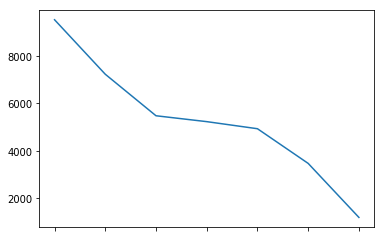

In [69]:
d6.plot()

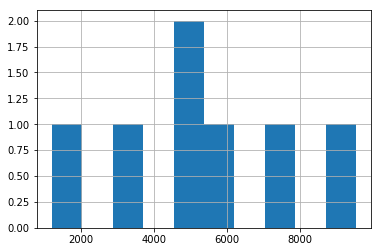

In [70]:
d6.hist()

In [71]:
d7=pd.crosstab(index=f4['variable'], columns=f4['value'])
d7

value,Analyze and understand data to influence product or business decisions,Build and/or run a machine learning service that operationally improves my product or workflows,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Do research that advances the state of the art of machine learning,None of these activities are an important part of my role at work,Other
variable,,,,,,,
Q11_Part_1,9532,0,0,0,0,0,0
Q11_Part_2,0,5481,0,0,0,0,0
Q11_Part_3,0,0,5233,0,0,0,0
Q11_Part_4,0,0,0,7233,0,0,0
Q11_Part_5,0,0,0,0,4934,0,0
Q11_Part_6,0,0,0,0,0,3471,0
Q11_Part_7,0,0,0,0,0,0,1192


In [304]:
d7.shape

(7, 7)